In [1]:
#could explore more to figure out what dtype is and where it is suppose to come from

In [2]:
import pickle
with open('DMTS_8odors_5acids_allMice_raw_PerceptualData_forRick_122319.pkl', 'rb') as f:
        data = pickle.load(f)

In [3]:
import pandas as pd
len(data["data"][0]["odor_1st"].unique())
data_values = pd.concat(data["data"])
len(data_values["odor_2nd"].unique() & data_values["odor_1st"].unique() )

24

In [4]:
import keras
from mle_1g_test import build_model
import numpy as np
import matplotlib.pyplot as plt
import psiz
import tensorflow as tf

In [5]:
#reconstructed_model = psiz.models.load_model("saving_whole_model")

In [6]:
kinds_of_models = pickle.load(open("kinds_of_models.p", "rb"))

In [7]:
kinds_of_models

{'rho__beta_trainable': {'rho_trainable': True,
  'beta_trainable': True,
  'gamma_trainable': False,
  'tau_trainable': False},
 'beta_trainable': {'rho_trainable': False,
  'beta_trainable': True,
  'gamma_trainable': False,
  'tau_trainable': False},
 'all_trainable': {'rho_trainable': True,
  'beta_trainable': True,
  'gamma_trainable': True,
  'tau_trainable': True}}

In [8]:
models = {kind_of_model: build_model(24, 2, **kwargs) for kind_of_model, kwargs in kinds_of_models.items()}

In [9]:
models

{'rho__beta_trainable': <psiz.models.rate.Rate at 0x7ff9e3b09970>,
 'beta_trainable': <psiz.models.rate.Rate at 0x7ff9e3b31f70>,
 'all_trainable': <psiz.models.rate.Rate at 0x7ff9e02ac520>}

In [10]:
for kind_of_model in models:
    models[kind_of_model].load_weights("weights_%s" % kind_of_model)

In [11]:
#1. Does not load embeddings but the line works
#This doesn't do much because embedding is already set to this, the models already know the dimensions
#models["all_trainable"].stimuli.embedding = tf.keras.layers.Embedding(25, 2, mask_zero=True)
#Example: rho_beta_true.stimuli.embedding = tf.keras.layers.Embedding(n_stimuli+1, n_dim, mask_zero=True)

In [12]:
#2. Does not work
#This approach does not work because it does not recognize "mask_zero"
#models["all_trainable"].stimuli.embedding(tf.keras.layers.Embedding, 25, 2, mask_zero=True)
#Example : #rho_beta_true.stimuli.embedding(tf.keras.layers.Embedding, n_stimuli+1, n_dim, mask_zero=True)

In [13]:
#3. Works but gives the same kind of error as number 4
#This is the error I get with this approach "AttributeError: 'str' object has no attribute 'base_dtype'"" but this approach does work as well
#models["all_trainable"].stimuli.embedding(tf.keras.layers.Embedding(25+1, 2, mask_zero=True))
# Example: rho_beta_true.stimuli.embedding(tf.keras.layers.Embedding(n_stimuli+1, n_dim, mask_zero=True))

In [17]:
models["all_trainable"].weights

[<tf.Variable 'embedding_2/embeddings:0' shape=(25, 2) dtype=float32, numpy=
 array([[-0.02450184,  0.03227954],
        [ 0.3707052 , -1.3452076 ],
        [ 3.5492425 , -3.8313591 ],
        [ 0.05953019, -0.14858124],
        [-0.27542132,  0.6020181 ],
        [-0.35246143, -0.9115645 ],
        [-0.16940136,  2.4336085 ],
        [ 0.8804023 , -0.39262605],
        [-1.1728923 , -0.3473146 ],
        [-0.20104401, -1.4539582 ],
        [ 0.08772816,  2.385558  ],
        [ 0.74953574, -1.2228943 ],
        [-1.0597167 , -1.3386103 ],
        [ 3.5770466 , -3.804791  ],
        [-0.27001533,  3.3858943 ],
        [ 3.5704138 , -3.8134565 ],
        [-1.579318  ,  3.696263  ],
        [-0.1734776 , -0.54340374],
        [ 0.04109466,  2.1736515 ],
        [ 0.6436011 , -0.17826529],
        [-0.95098966, -0.14855511],
        [-0.3467379 ,  0.37444702],
        [-0.2679815 ,  2.0110042 ],
        [ 0.5407864 ,  0.608418  ],
        [-1.0373363 ,  0.63397056]], dtype=float32)>,
 <tf.

In [18]:
#models["all_trainable"].stimuli.embedding(psiz.psiz.keras.layers.embeddings.EmbeddingLogNormalDiag)

In [19]:
# This "For user-defined classes which inherit from tf.keras.Model, Layer instances must be assigned to object attributes, typically in the constructor." 
# is why I had to pass the class in the constructor
models["all_trainable"].stimuli.embedding(psiz.psiz.keras.layers.embeddings)

AttributeError: module 'psiz.keras.layers.embeddings' has no attribute 'dtype'

In [20]:
models["beta_trainable"].stimuli.embedding(psiz.psiz.keras.layers.embeddings)

AttributeError: module 'psiz.keras.layers.embeddings' has no attribute 'dtype'

In [21]:
models["rho__beta_trainable"].stimuli.embedding(psiz.psiz.keras.layers.embeddings)

AttributeError: module 'psiz.keras.layers.embeddings' has no attribute 'dtype'

In [22]:
rho_beta_true_coords = models["rho__beta_trainable"].stimuli.embeddings.numpy()[0]
beta_true_coords = models["beta_trainable"].stimuli.embeddings.numpy()[0]
all_true_coords = models["all_trainable"].stimuli.embeddings.numpy()[0]

In [22]:
import plotly.express as px

In [23]:
def color_plots(mix_one, mix_two, mixture, coords):
    colors = ["black"]*25
    c = data["odorNames"].index(mix_one)
    h = data["odorNames"].index(mix_two)
    ch = data["odorNames"].index(mixture)
    colors[c] = "red"
    colors[h] = "blue"
    colors[ch] = "purple"
#     fig = px.scatter(*coords.T, color = colors)
    plt.scatter(*coords.T, c = colors)
    plt.show()
    #fig.show()

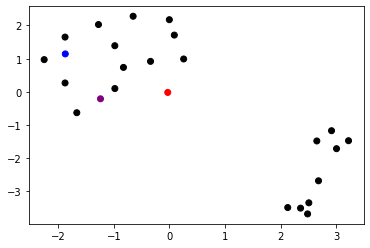

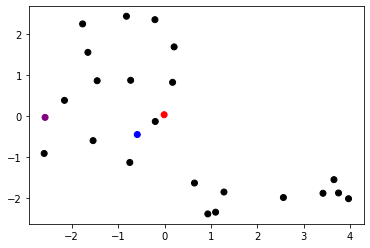

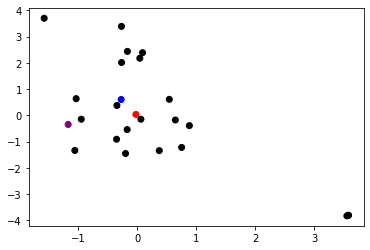

In [24]:
color_plots("CinAld", "CPAcd", "CinAld_CPAcd", rho_beta_true_coords)
color_plots("CinAld", "CPAcd", "CinAld_CPAcd", beta_true_coords)
color_plots("CinAld", "CPAcd", "CinAld_CPAcd", all_true_coords)

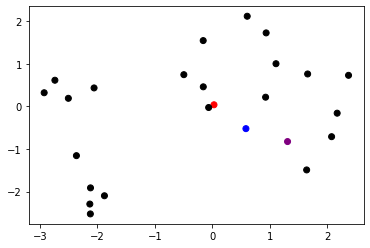

In [159]:
color_plots("CinAld","2Hep","CinAld_2Hep", rho_beta_true_coords)

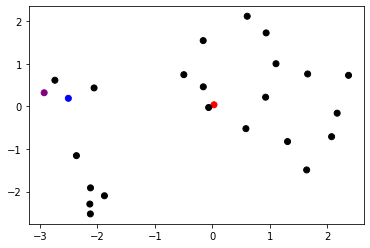

In [115]:
color_plots("CinAld", "IBAcd","CinAld_IBAcd", rho_beta_true_coords)

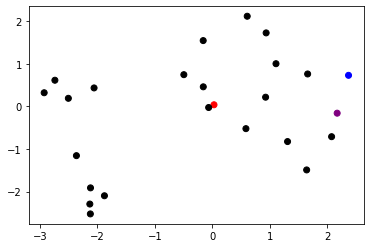

In [116]:
color_plots("CinAld","IVAcd","CinAld_IVAcd", rho_beta_true_coords)

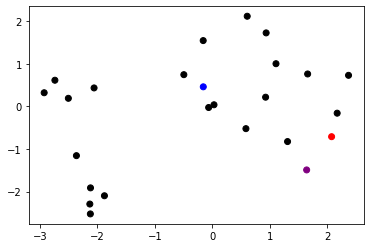

In [117]:
color_plots("EB", "CPAcd", "EB_CPAcd", rho_beta_true_coords)

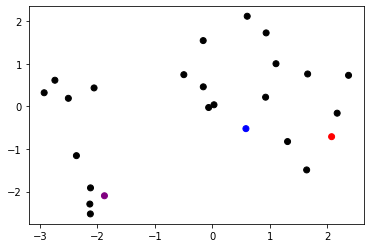

In [118]:
color_plots("EB", "2Hep","EB_2Hep", rho_beta_true_coords)

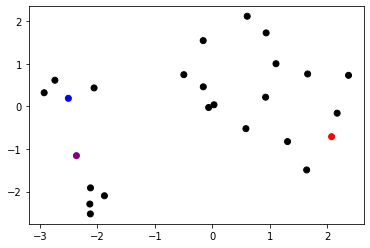

In [119]:
color_plots("EB", "IBAcd","EB_IBAcd", rho_beta_true_coords)

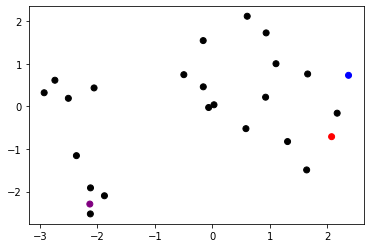

In [120]:
color_plots("EB","IVAcd","EB_IVAcd", rho_beta_true_coords)

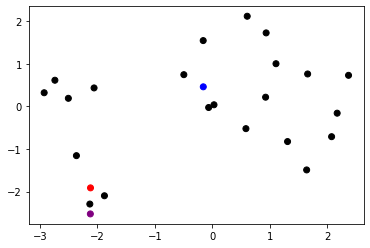

In [121]:
color_plots("2MBAcd","CPAcd","2MBAcd_CPAcd", rho_beta_true_coords)

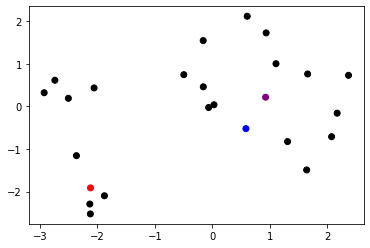

In [122]:
color_plots("2MBAcd","2Hep","2MBAcd_2Hep", rho_beta_true_coords)

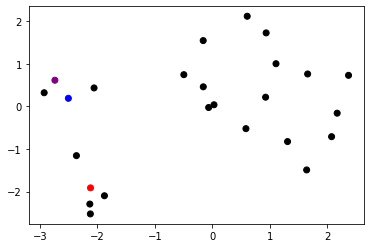

In [123]:
color_plots("2MBAcd","IBAcd", "2MBAcd_IBAcd", rho_beta_true_coords)

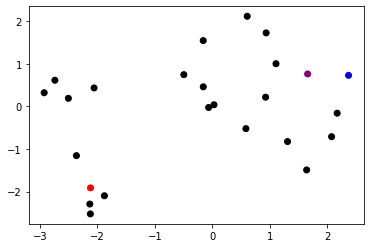

In [124]:
color_plots("2MBAcd","IVAcd","2MBAcd_IVAcd", rho_beta_true_coords)

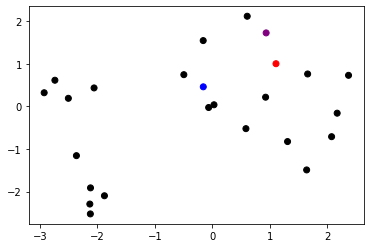

In [125]:
color_plots("22DMBAcd","CPAcd","22DMBAcd_CPAcd", rho_beta_true_coords)

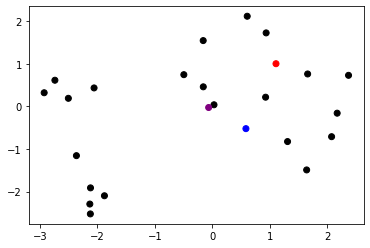

In [126]:
color_plots("22DMBAcd", "2Hep", "22DMBAcd_2Hep", rho_beta_true_coords)

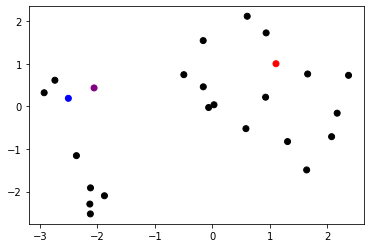

In [127]:
color_plots("22DMBAcd", "IBAcd", "22DMBAcd_IBAcd", rho_beta_true_coords)

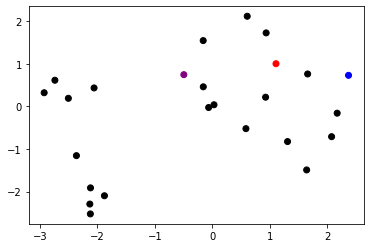

In [128]:
color_plots("22DMBAcd", "IVAcd", "22DMBAcd_IVAcd", rho_beta_true_coords)